In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from typing import List
from itertools import combinations
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
df = pd.read_csv("result.csv", sep=",")
df
df.charges.value_counts
df

,age,sex,bmi,children,smoker,region,charges
0,Any,Any,Any,Any,Any,Any,>=15000
1,Any,Any,Any,Any,Any,Any,<15000
2,"[0,50)",Any,Any,present,Any,Any,<15000
3,Any,Any,Any,Any,no,Any,>=15000
4,Any,Any,Any,Any,Any,Any,<15000
...,...,...,...,...,...,...,...
1333,Any,Any,Any,Any,Any,Any,<15000
1334,"[0,50)",Any,Any,Any,Any,Any,<15000
1335,Any,Any,"[30,40)",Any,no,Any,<15000
1336,Any,Any,Any,Any,Any,Any,<15000


In [7]:
"""def changeLabels(charge):
    if charge >= 15000:
        return ">=15000"
    return "<15000"
df.charges = df.charges.apply(changeLabels)
df.to_csv("deneme2-anonymized3.csv",index=False)"""
"""def changeLabels(bmi):
    return round(bmi)
df["bmi"] = df["bmi"].apply(changeLabels)
df.to_csv("insurance_labeled.csv",index=False)"""

'def changeLabels(bmi):\n    return round(bmi)\ndf["bmi"] = df["bmi"].apply(changeLabels)\ndf.to_csv("insurance_labeled.csv",index=False)'

In [236]:
label_encoder = preprocessing.LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["region"] = label_encoder.fit_transform(df["region"])
df["age"] = label_encoder.fit_transform(df["age"])
df["bmi"] = label_encoder.fit_transform(df["bmi"])
df["children"] = label_encoder.fit_transform(df["children"])





In [237]:
feature_columns = ["age","sex","bmi","children","smoker","region"]

In [274]:
x = df[feature_columns].values
y = df.charges.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
model = RandomForestClassifier(100)

In [275]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [276]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[394   1]
 [140   1]]


In [277]:
cr = metrics.classification_report(y_test, y_pred)
print("Classification Report: ")
print(cr)

Classification Report: 
              precision    recall  f1-score   support

      <15000       0.74      1.00      0.85       395
     >=15000       0.50      0.01      0.01       141

    accuracy                           0.74       536
   macro avg       0.62      0.50      0.43       536
weighted avg       0.68      0.74      0.63       536



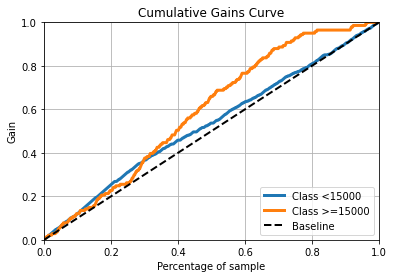

In [278]:
predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()